In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('../data/processed/df_listo_para_eda.csv',sep=';')
df

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,...,Anio,CUT Mes,Mes,Viajes Ocasionales,Temporada,PIB Region Origen,PIB Region Destino,Total Temporada Region,Total Temporada Provincia,Total Temporada Comuna
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,...,2019,1,enero,109,Alta,1061.580205,1061.580205,268129,76446,1276
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,...,2019,1,enero,298,Alta,1061.580205,1061.580205,268129,76446,5512
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,...,2019,1,enero,2594,Alta,1061.580205,1061.580205,268129,76446,22586
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,...,2019,1,enero,4138,Alta,1061.580205,1061.580205,268129,76446,21894
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,...,2019,1,enero,2071,Alta,1061.580205,3724.530431,500988,301193,187990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952619,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,Valle del Itata,162,...,2023,12,diciembre,17,Alta,833.567298,833.567298,790647,139183,19389
2952620,16305,San Nicolás,163,Punilla,16,Ñuble,16207,Treguaco,Resto región Ñuble,162,...,2023,12,diciembre,44,Alta,833.567298,833.567298,790647,139183,10967
2952621,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,Resto región Ñuble,163,...,2023,12,diciembre,108,Alta,833.567298,833.567298,790647,159556,23654
2952622,16305,San Nicolás,163,Punilla,16,Ñuble,16303,Ñiquén,Resto región Ñuble,163,...,2023,12,diciembre,47,Alta,833.567298,833.567298,790647,159556,32388


In [14]:
# Verificación de filas duplicadas

print(f'Filas Duplicadas: {df.duplicated().sum()}')

Filas Duplicadas: 0


In [15]:
# Identificar columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Columnas categóricas:", categorical_cols)
print("Columnas numéricas:", numerical_cols)
print("Cantidad de Columnas numéricas: ", len(numerical_cols))

Columnas categóricas: ['Comuna Origen', 'Provincia Origen', 'Region Origen', 'Comuna Destino', 'Destino Turistico', 'Provincia Destino', 'Region Destino', 'Mes', 'Temporada']
Columnas numéricas: ['CUT Comuna Origen', 'CUT Provincia Origen', 'CUT Region Origen', 'CUT Comuna Destino', 'CUT Provincia Destino', 'CUT Region Destino', 'Anio', 'CUT Mes', 'Viajes Ocasionales', 'PIB Region Origen', 'PIB Region Destino', 'Total Temporada Region', 'Total Temporada Provincia', 'Total Temporada Comuna']
Cantidad de Columnas numéricas:  14


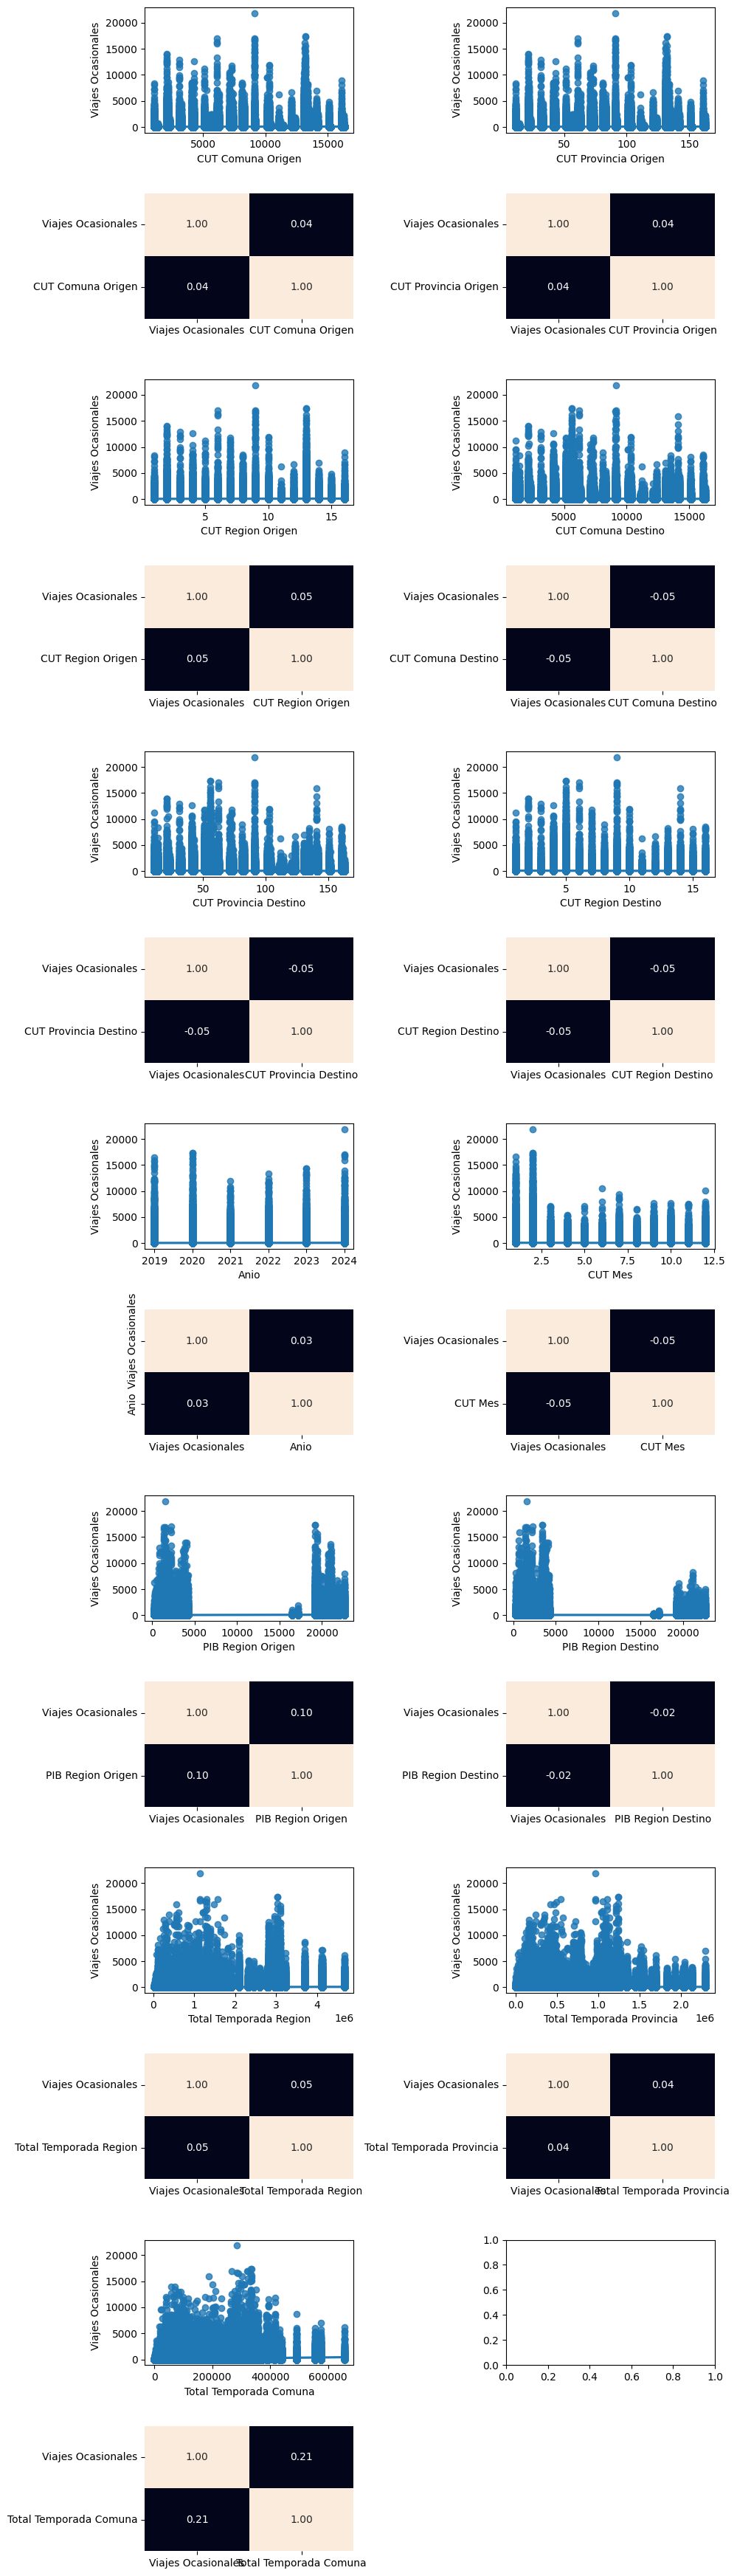

In [8]:
# Analisis Multivariante
    # Anlisis Numerico - numerico

def plot_numerical_vs_target(df, target_var):
    # Verificar que el DataFrame contiene solo variables numéricas
    if not all(df.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))):
        raise ValueError("El DataFrame debe contener solo variables numéricas.")

    # Verificar que la variable objetivo está en el DataFrame
    if target_var not in df.columns:
        raise ValueError(f"La variable objetivo '{target_var}' no se encuentra en el DataFrame.")

    # Obtener las variables numéricas excepto la variable objetivo
    num_vars = df.select_dtypes(include='number').columns
    num_vars = num_vars[num_vars != target_var]  # Excluir la variable objetivo

    # Calcular el número de filas necesarias para el subplot
    n_vars = len(num_vars)
    n_rows = (n_vars + 1) // 2  # Redondear hacia arriba para obtener suficientes filas

    # Crear la figura y los ejes
    fig, axis = plt.subplots(n_rows * 2, 2, figsize=(10, n_rows * 5))

    # Iterar sobre cada variable numérica y crear gráficos
    for i, var in enumerate(num_vars):
        row = i // 2 * 2  # Fila para regplot
        col = i % 2  # Columna para regplot

        # Graficar regplots
        sns.regplot(ax=axis[row, col], data=df, x=var, y=target_var)
        # Graficar heatmap
        sns.heatmap(df[[target_var, var]].corr(), annot=True, fmt='.2f', ax=axis[row + 1, col], cbar=False)

    # Eliminar ejes vacíos si hay un número impar de variables
    if n_vars % 2 != 0:
        fig.delaxes(axis[n_rows * 2 - 1, 1])

    # Ajustar el layout para evitar solapamiento
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
# plot_numerical_vs_target(df, 'charges')

plot_numerical_vs_target(df[numerical_cols], 'Viajes Ocasionales')

In [2]:
df = pd.read_csv('../data/processed/df_listo_para_eda.csv',sep=';')
#df = df.head(10000)
#df.sort_values(by=['CUT Comuna Origen', 'CUT Provincia Origen', 'CUT Region Origen', 'CUT Comuna Destino', 'CUT Provincia Destino', 'CUT Region Destino'],ascending=True)

In [3]:
total_nan = df.isnull().sum().sum()
print("Total de NaN en el DataFrame:", total_nan)

Total de NaN en el DataFrame: 0


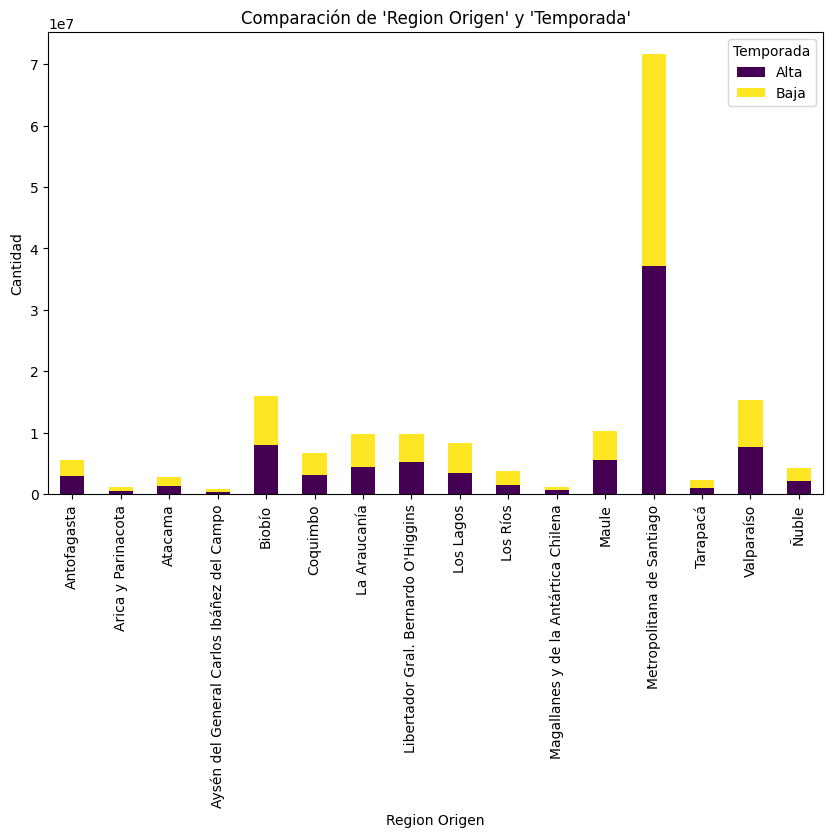

In [4]:
df_pivot = df.pivot_table(values='Viajes Ocasionales', index='Region Origen', columns='Temporada', aggfunc='sum').fillna(0)
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Comparación de 'Region Origen' y 'Temporada'")
plt.xlabel("Region Origen")
plt.ylabel("Cantidad")
plt.legend(title="Temporada")
plt.show()

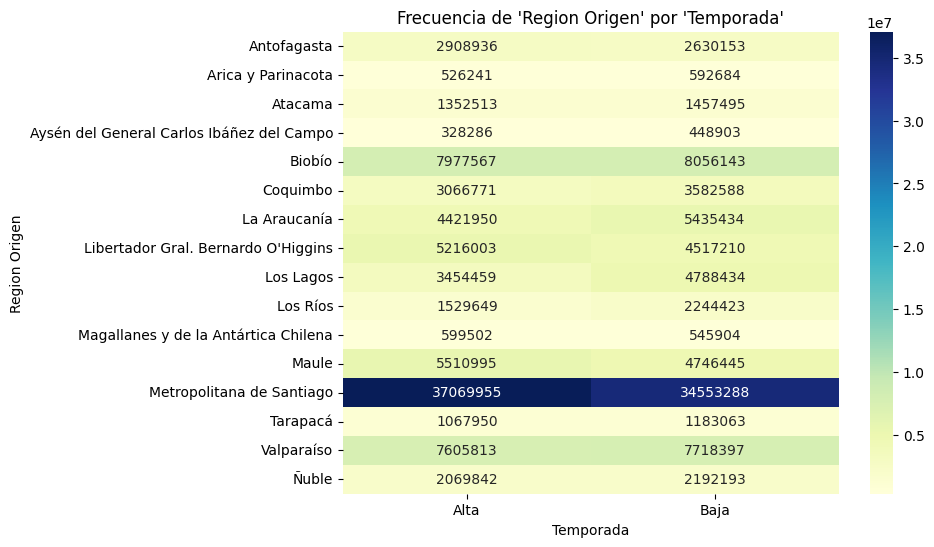

In [5]:
# Crear una tabla de frecuencias entre las dos variables categóricas
heatmap_data = df.pivot_table(values='Viajes Ocasionales', index='Region Origen', columns='Temporada', aggfunc='sum').fillna(0)

# Graficar el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Frecuencia de 'Region Origen' por 'Temporada'")
plt.xlabel("Temporada")
plt.ylabel("Region Origen")
plt.show()

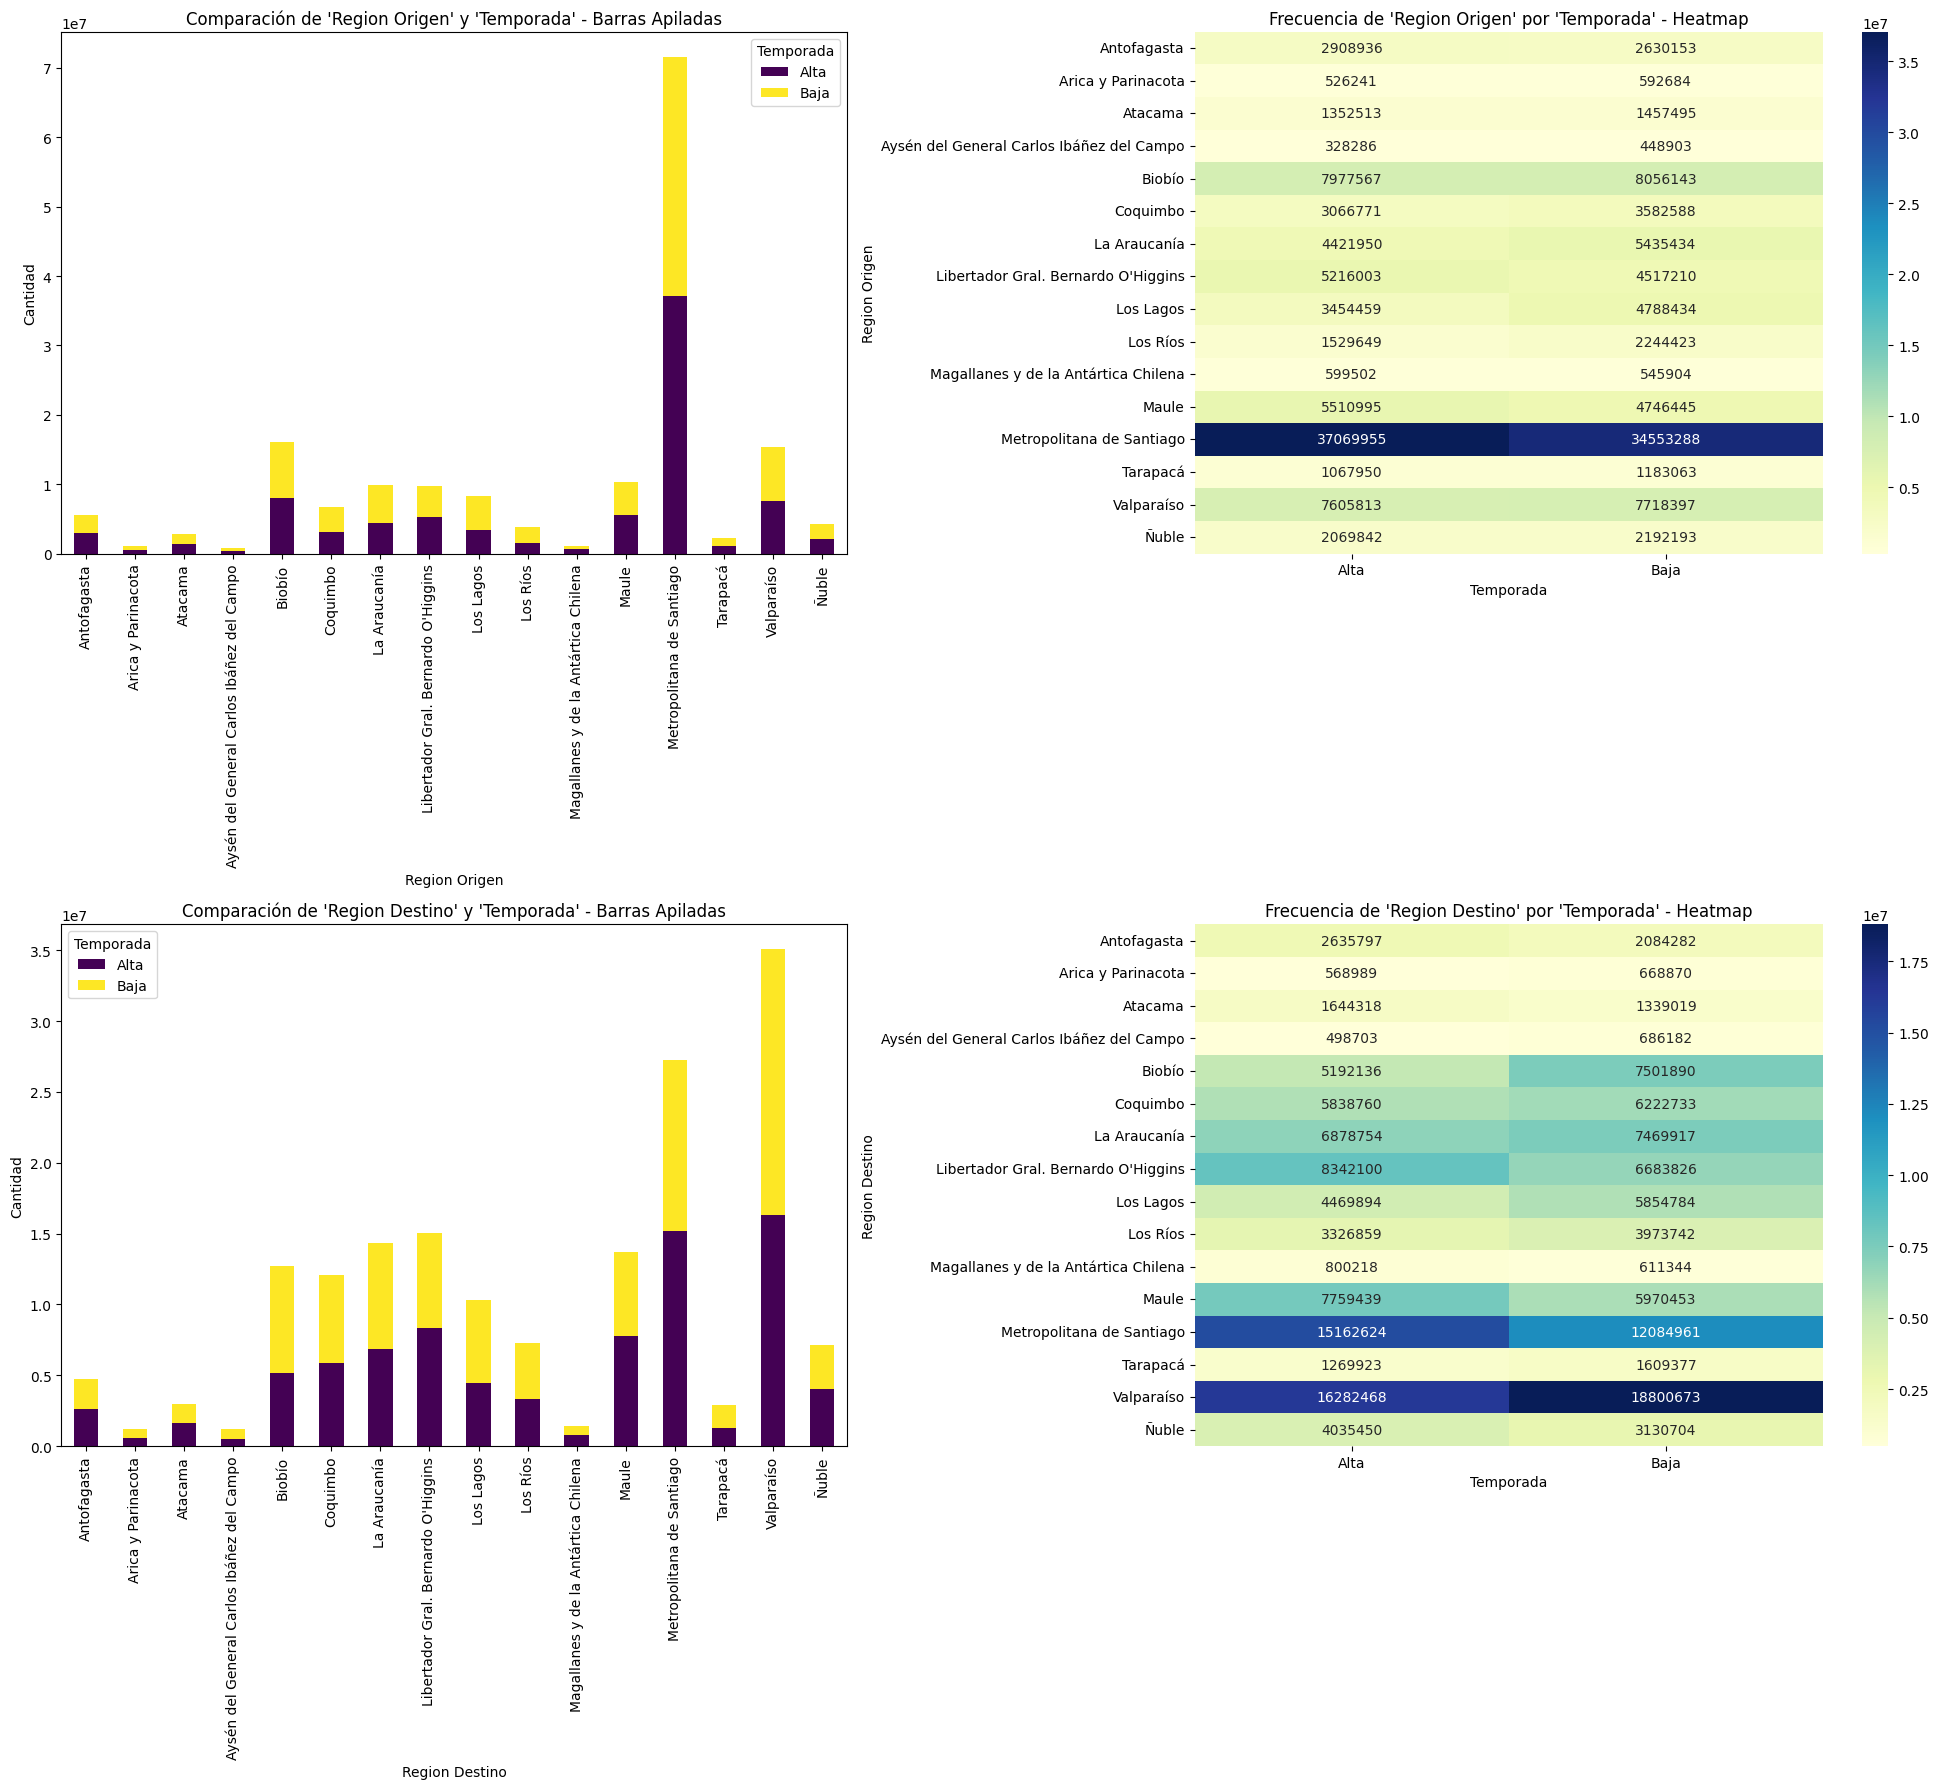

In [53]:

# Crear figura y subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(20, 18))

# Gráfico de Barras Apiladas en el primer subplot (arriba izquierda)
df_pivot = df.pivot_table(values='Viajes Ocasionales', index='Region Origen', columns='Temporada', aggfunc='sum').fillna(0)
df_pivot.plot(kind='bar', stacked=True, ax=axes[0, 0], colormap='viridis')
axes[0, 0].set_title("Comparación de 'Region Origen' y 'Temporada' - Barras Apiladas")
axes[0, 0].set_xlabel("Region Origen")
axes[0, 0].set_ylabel("Cantidad")
axes[0, 0].legend(title="Temporada")

# Gráfico de Calor (Heatmap) en el segundo subplot (arriba derecha)
heatmap_data = df.pivot_table(values='Viajes Ocasionales', index='Region Origen', columns='Temporada', aggfunc='sum').fillna(0)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".0f", ax=axes[0, 1])
axes[0, 1].set_title("Frecuencia de 'Region Origen' por 'Temporada' - Heatmap")
axes[0, 1].set_xlabel("Temporada")
axes[0, 1].set_ylabel("Region Origen")

# Repetir el Gráfico de Barras Apiladas en el tercer subplot (abajo izquierda)
df_pivot = df.pivot_table(values='Viajes Ocasionales', index='Region Destino', columns='Temporada', aggfunc='sum').fillna(0)
df_pivot.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='viridis')
axes[1, 0].set_title("Comparación de 'Region Destino' y 'Temporada' - Barras Apiladas")
axes[1, 0].set_xlabel("Region Destino")
axes[1, 0].set_ylabel("Cantidad")
axes[1, 0].legend(title="Temporada")

# Repetir el Gráfico de Calor (Heatmap) en el cuarto subplot (abajo derecha)
heatmap_data = df.pivot_table(values='Viajes Ocasionales', index='Region Destino', columns='Temporada', aggfunc='sum').fillna(0)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".0f", ax=axes[1, 1])
axes[1, 1].set_title("Frecuencia de 'Region Destino' por 'Temporada' - Heatmap")
axes[1, 1].set_xlabel("Temporada")
axes[1, 1].set_ylabel("Region Destino")

plt.tight_layout()
plt.show()

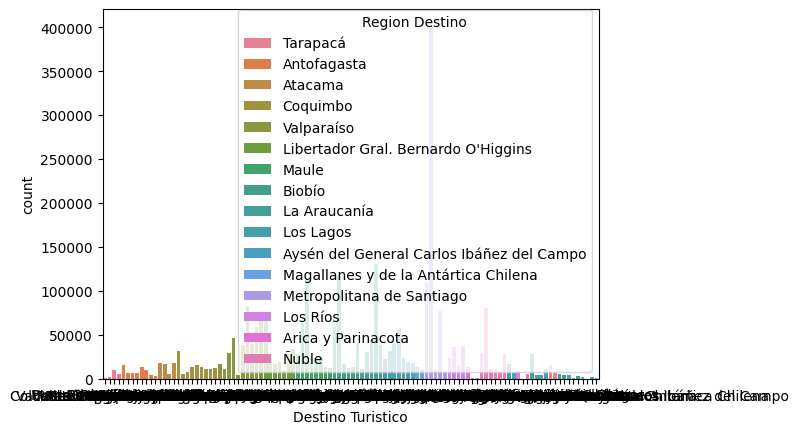

In [25]:
    # Analisis Categorico - Categerico 

#Contrastamos las variables categoricas contra la objetivo en un solo gráfico
#Como son variables categoricas utilizamos el boxplot
sns.countplot(data=df,x='Destino Turistico',hue='Region Destino')
plt.show()

In [10]:
    # Analisis Numerico - Categorico Columnas categóricas: ['Destino Turistico', 'Mes', 'Temporada']

#Debemos Factorizar las variables cátegoricas, para poder hacer matriz de correlaciónes 
df['CUT Destino Turistico'] = pd.factorize(df['Destino Turistico'])[0]
df['CUT Temporada'] = pd.factorize(df['Temporada'])[0]

# Ordenar columnas
columnas = [
    'CUT Comuna Origen', 'Comuna Origen', 'CUT Provincia Origen', 'Provincia Origen',
    'CUT Region Origen', 'Region Origen', 'CUT Comuna Destino', 'Comuna Destino', 'CUT Destino Turistico',
    'Destino Turistico', 'CUT Provincia Destino', 'Provincia Destino', 'CUT Region Destino',
    'Region Destino', 'Anio', 'CUT Mes', 'Mes', 'Viajes Ocasionales', 'CUT Temporada', 'Temporada',
    'PIB Region Origen', 'PIB Region Destino', 'Total Temporada Region', 'Total Temporada Provincia', 'Total Temporada Comuna'
]

df = df[columnas]

#Comprobamos como quedo el DataFrame con las variables factorizadas
df.head()

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,CUT Destino Turistico,Destino Turistico,...,CUT Mes,Mes,Viajes Ocasionales,CUT Temporada,Temporada,PIB Region Origen,PIB Region Destino,Total Temporada Region,Total Temporada Provincia,Total Temporada Comuna
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,0,Camiña,...,1,enero,109,0,Alta,1061.580205,1061.580205,268129,76446,1276
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,1,Colchane - P.N. Volcán Isluga,...,1,enero,298,0,Alta,1061.580205,1061.580205,268129,76446,5512
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,2,Resto región Tarapacá,...,1,enero,2594,0,Alta,1061.580205,1061.580205,268129,76446,22586
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,3,Pica,...,1,enero,4138,0,Alta,1061.580205,1061.580205,268129,76446,21894
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,4,Antofagasta,...,1,enero,2071,0,Alta,1061.580205,3724.530431,500988,301193,187990


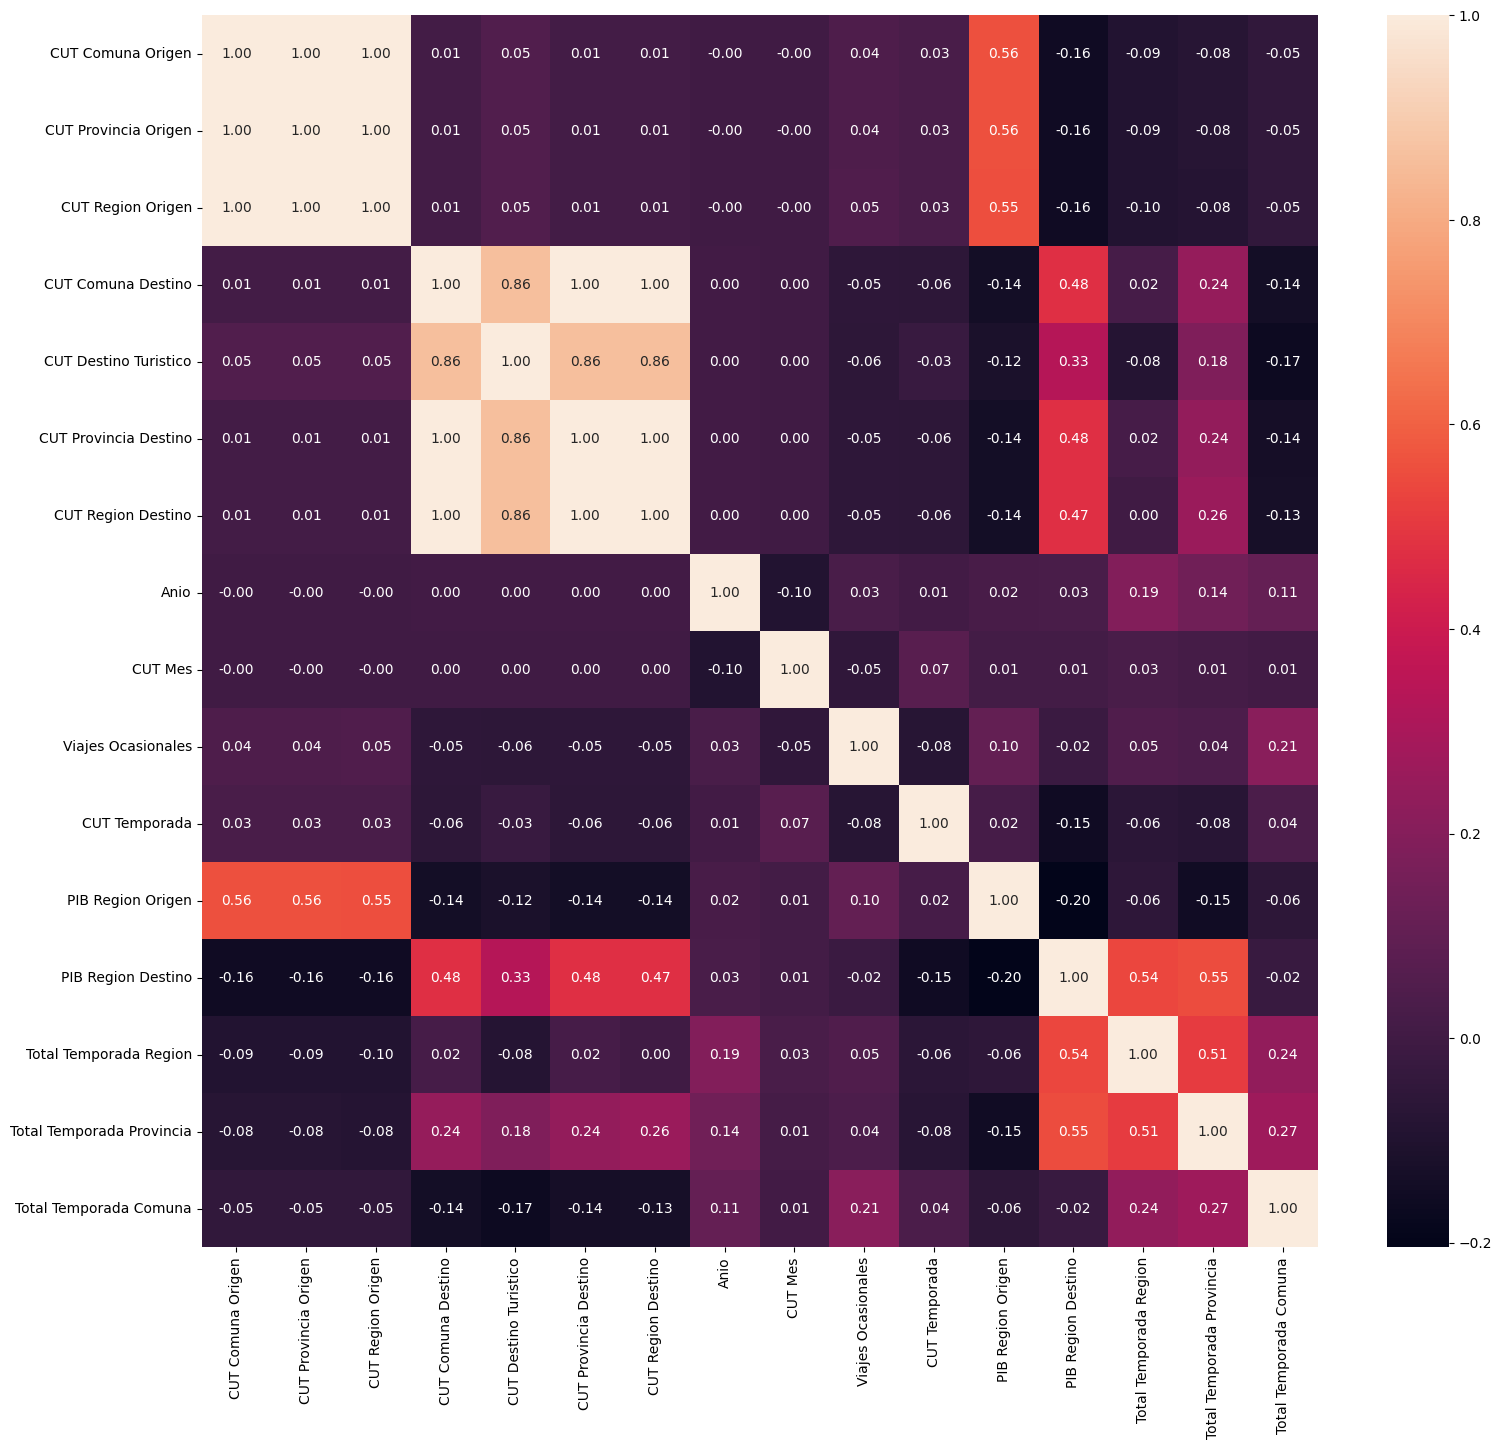

In [68]:
df_corr= df.drop(['Comuna Origen', 'Provincia Origen', 'Region Origen', 'Comuna Destino', 'Destino Turistico', 'Provincia Destino', 'Region Destino', 'Mes', 'Temporada'],axis=1)
df_corr

plt.figure(figsize=(18, 16))
sns.heatmap(df_corr.corr(),annot=True,fmt=".2f")
plt.show()